# TASK-1
Linear Regression Dataset without using inbuilt functions

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Creating the dataset and Adding noise

In [2]:
np.random.seed(15)
X= np.linspace(0,100,100)

noise = np.random.normal(0, 10, X.shape)
Y = 3 * X + 5 + noise
data = pd.DataFrame({'Input': X, 'Output': Y})


### Displaying the dataset


In [7]:

data.to_csv('linear_regression_dataset.csv', index=False)
print(data)

         Input      Output
0     0.000000    1.876715
1     1.010101   11.423150
2     2.020202    9.501521
3     3.030303    9.073012
4     4.040404   19.476901
5     5.050505    2.515463
6     6.060606   12.223198
7     7.070707   15.334464
8     8.080808   26.190724
9     9.090909   27.535244
10   10.101010   33.297085
11   11.111111   41.885301
12   12.121212   48.258814
13   13.131313   48.499836
14   14.141414   41.774458
15   15.151515   56.448452
16   16.161616   51.855485
17   17.171717   72.517297
18   18.181818   66.361727
19   19.191919   62.724559
20   20.202020   64.728264
21   21.212121   58.815185
22   22.222222   72.883571
23   23.232323   63.322597
24   24.242424   81.217299
25   25.252525   62.172444
26   26.262626   72.116060
27   27.272727  101.067150
28   28.282828  104.814138
29   29.292929  105.778108
30   30.303030   77.791638
31   31.313131   83.956322
32   32.323232   87.468265
33   33.333333   88.060930
34   34.343434  110.302943
35   35.353535  106.163259
3

### Analize the dataset with 2-D plot


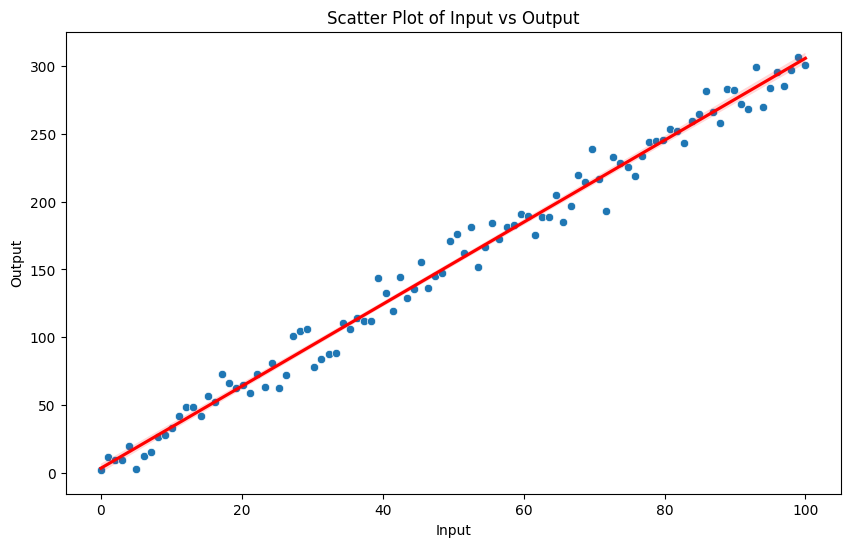

In [8]:
data = pd.read_csv('linear_regression_dataset.csv')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Input', y='Output', data=data)
sns.regplot(x='Input', y='Output', data=data, scatter=False, color='red')

plt.title('Scatter Plot of Input vs Output')
plt.xlabel('Input')
plt.ylabel('Output')

plt.show()


### Calculating the weight and offset 

In [9]:

data = pd.read_csv('linear_regression_dataset.csv')

#Split the data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=35)

# Extract input and output variables
X_train = train_data['Input'].values
Y_train = train_data['Output'].values
X_test = test_data['Input'].values
Y_test = test_data['Output'].values

# Adding the bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Compute the closed-form solution for weights
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(Y_train)

# Extract the weights (m) and offset (c)
c, m = theta_best

# Compute predictions for the test set
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
Y_pred = X_test_b.dot(theta_best)


### Mean Absolute Error, Root Mean Squared Error & R2 

In [10]:
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"Weight (m): {m}")
print(f"Offset (c): {c}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² score: {r2}")

Weight (m): 3.014785842594636
Offset (c): 3.666002169883196
Mean Absolute Error (MAE): 7.256389896134301
Root Mean Squared Error (RMSE): 9.669228603173497
R² score: 0.9877481848814201


### Predictions for the training set



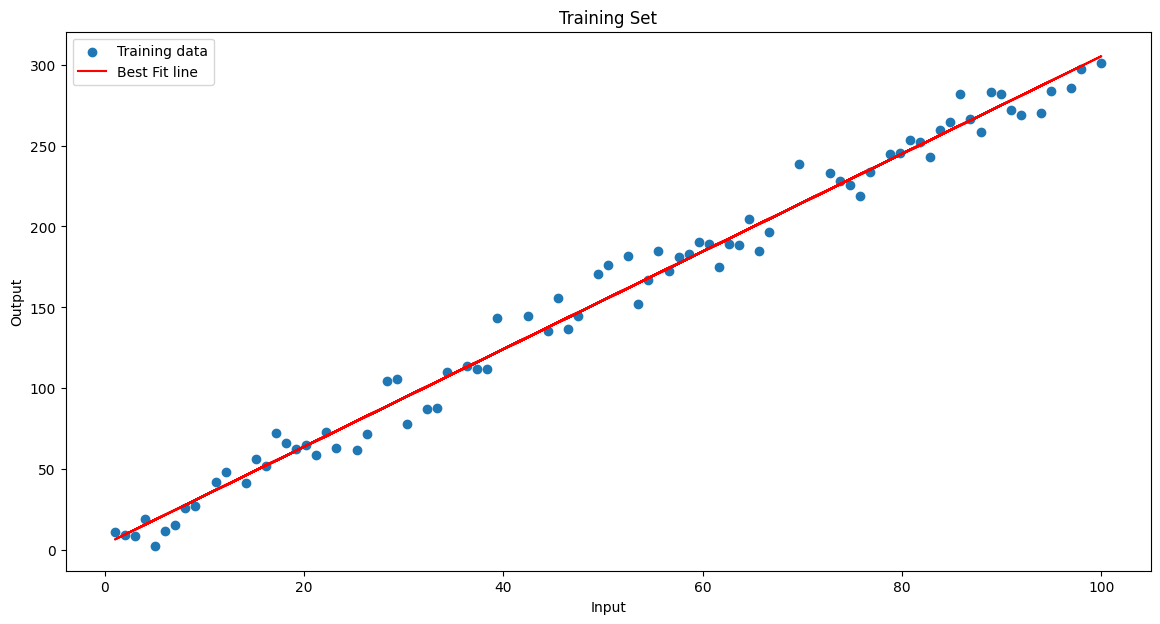

In [22]:
Y_train_pred = X_train_b.dot(theta_best)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
Y_test_pred = X_test_b.dot(theta_best)


plt.figure(figsize=(14, 7))
plt.scatter(X_train, Y_train, label='Training data')
plt.plot(X_train, Y_train_pred, color='red', label='Best Fit line')
plt.title('Training Set')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

### Test Data using Matplotlib

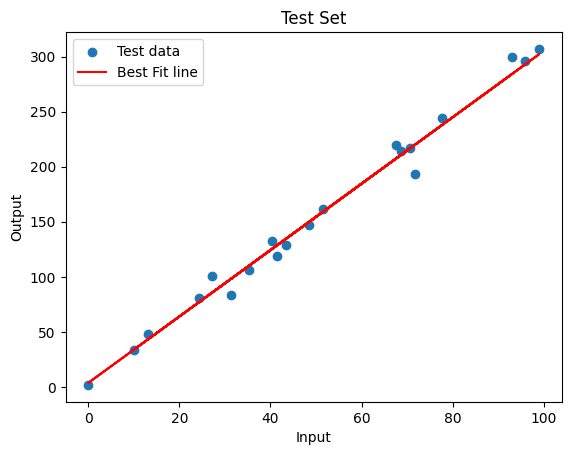

In [28]:
plt.scatter(X_test, Y_test, label='Test data')
plt.plot(X_test, Y_test_pred, color='red', label='Best Fit line')
plt.title('Test Set')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

### Comparing the values with the inbuilt functions

In [29]:
# Create and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), Y_train)
LinearRegression()



LinearRegression()

### Extract the weights (m) and offset (c)

In [30]:
m_sklearn = lin_reg.coef_[0]
c_sklearn = lin_reg.intercept_

### Compute predictions for the test set

In [32]:
Y_pred_sklearn = lin_reg.predict(X_test.reshape(-1, 1))

# Calculate Mean Absolute Error, Root Mean Squared Error & R2


In [33]:
mae_sklearn = mean_absolute_error(Y_test, Y_pred_sklearn)
rmse_sklearn = np.sqrt(mean_squared_error(Y_test, Y_pred_sklearn))
r2_sklearn = r2_score(Y_test, Y_pred_sklearn)

### Compare with the implemented model


In [36]:
print(f"Sklearn Weight (m): {m_sklearn}")
print(f"Sklearn Offset (c): {c_sklearn}")
print(f"Sklearn Mean Absolute Error (MAE): {mae_sklearn}")
print(f"Sklearn Root Mean Squared Error (RMSE): {rmse_sklearn}")
print(f"Sklearn R² score: {r2_sklearn}")

print() 

print(f"Implemented Weight (m): {m}")
print(f"Implemented Offset (c): {c}")
print(f"Implemented Mean Absolute Error (MAE): {mae}")
print(f"Implemented Root Mean Squared Error (RMSE): {rmse}")
print(f"Implemented R² score: {r2}")

print('\n\n')

print("DIFFERENCE IN VALUES:")
print(f"Weight (m): {m - m_sklearn}")
print(f"Offset (c): {c - c_sklearn}")
print(f"Mean Absolute Error (MAE): {mae - mae_sklearn}")
print(f"Root Mean Squared Error (RMSE): {rmse - rmse_sklearn}")
print(f"R² score: {r2 - r2_sklearn}")



Sklearn Weight (m): 3.0147858425946414
Sklearn Offset (c): 3.6660021698830576
Sklearn Mean Absolute Error (MAE): 7.256389896134232
Sklearn Root Mean Squared Error (RMSE): 9.669228603173465
Sklearn R² score: 0.9877481848814202

Implemented Weight (m): 3.014785842594636
Implemented Offset (c): 3.666002169883196
Implemented Mean Absolute Error (MAE): 7.256389896134301
Implemented Root Mean Squared Error (RMSE): 9.669228603173497
Implemented R² score: 0.9877481848814201



DIFFERENCE IN VALUES:
Weight (m): -5.329070518200751e-15
Offset (c): 1.3855583347321954e-13
Mean Absolute Error (MAE): 6.927791673660977e-14
Root Mean Squared Error (RMSE): 3.197442310920451e-14
R² score: -1.1102230246251565e-16


# TASK-2

Multiple Linear Regression Dataset using inbuilt functions

### Importing the required libraries

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Create the dataset

In [45]:
df = pd.read_csv('Student_Performance.csv')

# Define X (input features) and y (target variable)
X = df.drop(columns=['Extracurricular Activities'])
y = df['Performance Index']


### Splitting the dataset

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=35)


### Creating and training the Linear Regression model


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression()

LinearRegression()


### Predict the target variable for the test set


In [48]:
y_pred = model.predict(X_test)

### Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error & R2


In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5 # Manually compute RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_train.shape[1]                    # Number of predictors

# Adjusted R^2
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)
print("Adjusted R^2 Score:", adj_r2)


Mean Absolute Error (MAE): 2.7062796448262817e-15
Root Mean Squared Error (RMSE): 4.432891285499274e-15
R^2 Score: 1.0
Adjusted R^2 Score: 1.0




### Finding the column with the highest contribution

In [51]:
coefficients = pd.Series(model.coef_, index=X.columns)
top_feature = coefficients.abs().idxmax()
print(f"The column with the highest contribution is: {top_feature}")



The column with the highest contribution is: Performance Index


### Checking the Adjusted R2 score after adding the next important feature



In [54]:
for column in X.columns:
    if column == top_feature:
        continue

X_subset = X[[top_feature, column]]
X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
model.fit(X_train_subset, y_train)
y_pred_subset = model.predict(X_test_subset)
r2_subset = r2_score(y_test, y_pred_subset)
adj_r2_subset = 1 - (1 - r2_subset) * (n - 1) / (n - 2)

print(f"Adjusted R2 Score with {top_feature} and {column} : {adj_r2_subset}")

Adjusted R2 Score with Performance Index and Performance Index : 1.0
